In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

In [3]:
SLAKE_DATA = "OPEN_data_en.csv"
VQARAD_DATA = "vqarad_OPEN.csv"

SLAKE_df = pd.read_csv(SLAKE_DATA)
VQARAD_df = pd.read_csv(VQARAD_DATA)

In [4]:
SLAKE_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4252 entries, 0 to 4251
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   img_id        4252 non-null   int64 
 1   img_name      4252 non-null   object
 2   question      4252 non-null   object
 3   answer        4207 non-null   object
 4   q_lang        4252 non-null   object
 5   location      4252 non-null   object
 6   modality      4252 non-null   object
 7   answer_type   4252 non-null   object
 8   base_type     4252 non-null   object
 9   content_type  4252 non-null   object
 10  triple        4252 non-null   object
 11  qid           4252 non-null   int64 
dtypes: int64(2), object(10)
memory usage: 398.8+ KB


In [5]:
VQARAD_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   qid                735 non-null    int64 
 1   phrase_type        735 non-null    object
 2   qid_linked_id      735 non-null    object
 3   image_case_url     735 non-null    object
 4   image_name         735 non-null    object
 5   image_organ        735 non-null    object
 6   evaluation         735 non-null    object
 7   question           735 non-null    object
 8   question_rephrase  644 non-null    object
 9   question_relation  620 non-null    object
 10  question_frame     427 non-null    object
 11  question_type      735 non-null    object
 12  answer             734 non-null    object
 13  answer_type        735 non-null    object
dtypes: int64(1), object(13)
memory usage: 80.5+ KB


In [6]:
def df_unique_values(df, MAX_VALUES=10, col=None):

    print("\n================== UNIQUE VALUES REPORT ==================\n")

    if col is not None:
        if col not in df.columns:
            print(f"Column '{col}' does not exist in the DataFrame.")
            return
        
        unique_vals = df[col].unique()
        num_unique = len(unique_vals)

        print(f"Column Name: {col}")

        if num_unique > MAX_VALUES:
            print(f"  Unique Values ({num_unique} total): showing first {MAX_VALUES}")
            print(f"  {list(unique_vals[:MAX_VALUES])}")
        else:
            print(f"  Unique Values ({num_unique} total):")
            print(f"  {unique_vals}")

        print("\n  Value Counts:")
        print(df[col].value_counts().head(MAX_VALUES))

        print("\n====================== END REPORT ======================\n")
        return
    
    for col in df.columns:
        print(f"Column Name: {col}")
        unique_vals = df[col].unique()
        num_unique = len(unique_vals)

        if num_unique > MAX_VALUES:
            print(f"  Unique Values ({num_unique} total): showing first {MAX_VALUES}")
            print(f"  {list(unique_vals[:MAX_VALUES])}")
        else:
            print(f"  Unique Values ({num_unique} total):")
            print(f"  {unique_vals}")

        print("\n  Value Counts:")
        print(df[col].value_counts().head(MAX_VALUES))
        print("\n--------------------------------------------------------------\n")

    print("========================== END REPORT =========================\n")

In [7]:
def plot_distribution(df, col = None, x_label = "x_label", y_label = "y_label", title = "title", display_counts = True):
    counts = df[col].value_counts()

    plt.figure()
    ax = counts.plot(kind="bar")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    if display_counts:
        # Add counts on bars
        for i, v in enumerate(counts.values):
            ax.text(i, v + (0.01 * v), str(v), ha='center', va='bottom')

    plt.show()

In [8]:
def drop_rows(df, col, target_rows, save_to_csv=True, csv_file="Updated_full_data.csv", csv_folder="CSV Files"):
    if not isinstance(target_rows, (list, tuple, set)):
        target_rows = [target_rows]

    df_filtered = df[~df[col].isin(target_rows)]

    if save_to_csv:
        if not os.path.exists(csv_folder):
            os.makedirs(csv_folder)

        csv_path = os.path.join(csv_folder, csv_file)

        if not os.path.exists(csv_path):
            df_filtered.to_csv(csv_path, index=False)
            print(f"New csv file created: {csv_file}")
        else:
            print(f"CSV file already exists at: {csv_path}")

    return df_filtered


def drop_cols(df, cols_to_drop, save_to_csv = True, csv_file = "Updated_full_data.csv", csv_folder = "CSV FILES"):
    df_filtered = df.drop(columns = cols_to_drop)

    if save_to_csv:
        if not os.path.exists(csv_folder):
            os.makedirs(csv_folder)

        csv_path = os.path.join(csv_folder, csv_file)

        if not os.path.exists(csv_path):
            df_filtered.to_csv(csv_path, index=False)
            print(f"New csv file name {csv_file}")
        else:
            print(f"csv file already exists at {csv_path}")

    return df_filtered

In [9]:
cols_to_drop_SLAKE = ["q_lang", "modality", "base_type", "triple"]
SLAKE_df = drop_rows(SLAKE_df, "content_type", "KG", save_to_csv= False)
SLAKE_df = drop_cols(SLAKE_df, cols_to_drop_SLAKE, csv_file="SLAKE_OPEN_Filtered.csv")

csv file already exists at CSV FILES/SLAKE_OPEN_Filtered.csv


In [10]:
cols_to_drop_VQA = ["phrase_type", "qid_linked_id", "image_case_url", "evaluation", "question_rephrase", "question_relation", "question_frame"]
VQARAD_df = drop_cols(VQARAD_df, cols_to_drop_VQA, csv_file="VQARAD_OPEN_Filtered.csv")

csv file already exists at CSV FILES/VQARAD_OPEN_Filtered.csv


## Naming Convention

These columns are shared across both datasets.

| # | Standardized Col Name | SLAKE Col Name | VQARAD Col Name |
|---|----------------------|----------------|-----------------|
| 1 | image_name           | img_name       | image_name      |
| 2 | question             | question       | question        |
| 3 | answer               | answer         | answer          |
| 4 | location             | location       | image_organ     |
| 5 | answer_type          | answer_type    | answer_type     |
| 6 | content_type         | content_type   | question_type   |
| 7 | question_id          | qid            | qid             |

In [11]:
def rename_to_standard(df, standardized_cols, source_cols):
    rename_map = {
        src: std for std, src in zip(standardized_cols, source_cols)
        if src in df.columns
    }

    df = df.rename(columns=rename_map)

    for col in standardized_cols:
        if col not in df.columns:
            df[col] = np.nan


    return df[standardized_cols]

In [12]:
standardized = [
    "image_name", "question", "answer",
    "location", "answer_type", "content_type", "question_id"
]

slake_cols = [
    "img_name", "question", "answer",
    "location", "answer_type", "content_type", "qid"
]

vqarad_cols = [
    "image_name", "question", "answer",
    "image_organ", "answer_type", "question_type", "qid"
]

In [13]:
SLAKE_df = rename_to_standard(SLAKE_df, standardized, slake_cols)
VQARAD_df = rename_to_standard(VQARAD_df, standardized, vqarad_cols)

In [14]:
SLAKE_df.info()
VQARAD_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3622 entries, 0 to 4251
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   image_name    3622 non-null   object
 1   question      3622 non-null   object
 2   answer        3601 non-null   object
 3   location      3622 non-null   object
 4   answer_type   3622 non-null   object
 5   content_type  3622 non-null   object
 6   question_id   3622 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 226.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   image_name    735 non-null    object
 1   question      735 non-null    object
 2   answer        734 non-null    object
 3   location      735 non-null    object
 4   answer_type   735 non-null    object
 5   content_type  735 non-null    object
 6   question_id   735 non-nu

In [15]:
def merge_df(df):
    merged_df = pd.concat(df, ignore_index=True, sort=False)
    return merged_df

df_list = [SLAKE_df, VQARAD_df]
merged_df = merge_df(df_list)

In [16]:
def standardized_rows(val, mapping=None, keep_multiple=True):
    if pd.isna(val):
        return val
    
    v = str(val).strip().lower()

    parts = [p.strip() for p in v.split(",")]

    if mapping is not None:
        parts = [mapping.get(p, p) for p in parts]

    return ", ".join(parts) if keep_multiple else parts[0]

In [17]:
df_unique_values(merged_df, MAX_VALUES= 100, col= "content_type")


================== UNIQUE VALUES REPORT ==================

Column Name: content_type
  Unique Values (27 total):
  ['Modality' 'Position' 'Organ' 'Size' 'Abnormality' 'Quantity' 'Plane'
 'Shape' 'Color' 'MODALITY' 'ORGAN' 'PLANE' 'ABN' 'PRES' 'ATTRIB'
 'PRES, POS' 'POS' 'COLOR' 'OTHER' 'COUNT' 'Other' 'SIZE' 'POS, PRES'
 'POS, ABN' 'ABN, POS' 'SIZE, COLOR' 'ATRIB']

  Value Counts:
content_type
Position       1094
Organ           650
Modality        551
Quantity        328
Abnormality     275
Size            271
POS             219
Plane           211
Color           182
PRES            139
MODALITY         93
ABN              70
PLANE            61
Shape            60
ORGAN            41
OTHER            40
ATTRIB           34
SIZE             10
COLOR             9
COUNT             5
POS, PRES         4
PRES, POS         2
Other             2
POS, ABN          2
SIZE, COLOR       2
ABN, POS          1
ATRIB             1
Name: count, dtype: int64

====================== END REPORT

In [30]:
content_type_mapping = {
    "organ": "organ",
    "abnormality": "abnormality",
    "abn": "abnormality",
    "size": "size",
    "count": "size",
    "modality": "modality",
    "plane": "plane",
    "position": "position",
    "pos": "position",
    "color": "color",
    "atrib": "attribute",
    "attrib": "attribute",
    "prse": "presence",
    "pres": "presence",
    "other": "other"
}

merged_df["content_type"] = merged_df["content_type"].apply(
    lambda x: standardized_rows(x, mapping=content_type_mapping)
)

In [31]:
df_unique_values(merged_df, MAX_VALUES= 100, col= "location")


================== UNIQUE VALUES REPORT ==================

Column Name: location
  Unique Values (13 total):
  ['abdomen' 'lung' 'chest_heart' 'chest_lung' 'brain_tissue' 'brain_face'
 'brain' 'neck' 'chest_mediastinal' 'pelvic cavity' 'chest' 'head' 'abd']

  Value Counts:
location
lung                 1368
abdomen              1053
brain_tissue          527
head                  287
brain                 263
chest                 226
abd                   211
pelvic cavity          95
brain_face             93
chest_lung             81
neck                   75
chest_heart            55
chest_mediastinal      12
Name: count, dtype: int64

====================== END REPORT ======================



In [32]:
location_mapping = {
    "abdomen": "abdomen",
    "lung": "lung",
    "chest_heart": "chest_heart",
    "chest_lung": "chest_lung",
    "brain_tissue": "brain_tissue",
    "brain_face": "brain_face",
    "brain": "brain",
    "neck": "neck",
    "chest_mediastinal": "chest_mediastinal",
    "pelvic cavity": "pelvic cavity",
    "chest": "chest",
    "head": "head",
    "abd": "abd"
}

merged_df["location"] = merged_df["location"].apply(
    lambda x: standardized_rows(x, mapping=location_mapping)
)

In [33]:
df_unique_values(merged_df, MAX_VALUES= 100, col= "answer")


================== UNIQUE VALUES REPORT ==================

Column Name: answer
  Unique Values (444 total): showing first 100
  ['mri', 'abdomen', 't2', 'right', 'ct', 'chest', 'liver, heart, spleen, lung', 'liver', 'spinal cord', 'lung', 'lung cancer', 'right lung, left', 'lung, heart', nan, 'left lung, right', 'left lung, lower right', 'lower right', 'lung, liver', 'right lung, lower left', 'heart', 'not seen', 'x-ray', 'effusion', 'noudle', 'left lung, upper right', 'cardiomegaly, pneumothorax', 'center, left lung', 'nodule', 'atelectasis', 'cardiomegal', 'center', 'pneumonia', 'cardiomega', 'mass, atelectasis', 'both lung', 'cardiomegaly', '2', 'infiltration', 'mass', 'cardiomegaly, infiltration, effusion', 'atelectasis, effusion', 'both lungs', 'pneumothorax', 'right lung, upper left', 'left lung', 'liver cancer', 'left', 'liver, left', '0', 'top', 'liver, top', 'transverse  plane', 'right lung', 'left kidney', 'right kidney', '1', 'spleen', 'left and top', 'liver and heart', 'u

In [34]:
answer_mapping = {
    "abnormal": "abnormal",
    "abscess": "abscess",
    "almost the same": "almost the same",
    "ap": "ap",
    "asymmetric": "asymmetric",
    "axial": "axial",
    "base": "base",
    "bilateral": "bilateral",
    "bilateral frontal lobes": "bilateral frontal lobes",
    "bladder": "bladder",
    "both": "both",
    "both sides": "both sides",
    "colon": "colon",
    "contrast": "contrast",
    "contrast ct with gi and iv contrast": "contrast ct with gi and iv contrast",
    "coronal plane": "coronal plane",
    "ct": "ct",
    "cystic": "cystic",
    "diffuse": "diffuse",
    "duodenum": "duodenum",
    "enlarged": "enlarged",
    "esophagus": "esophagus",
    "exterior": "exterior",
    "female": "female",
    "flair": "flair",
    "gray": "gray",
    "gray matter": "gray matter",
    "heart": "heart",
    "heterogeneous": "heterogeneous",
    "hyperdense": "hyperdense",
    "hyperinflation": "hyperinflation",
    "hyperintense": "hyperintense",
    "hypodense": "hypodense",
    "irregular": "irregular",
    "kidney": "kidney",
    "left": "left",
    "left kidney": "left kidney",
    "left lung": "left lung",
    "left side": "left side",
    "less dense": "less dense",
    "liver": "liver",
    "lower right": "lower right",
    "lung": "lung",
    "medical process": "medical process",
    "mri": "mri",
    "more dense": "more dense",
    "neck": "neck",
    "no": "no",
    "non-contrast": "non-contrast",
    "non-contrast ct": "non-contrast ct",
    "non-enhanced": "non-enhanced",
    "normal": "normal",
    "on top of the patient": "on top of the patient",
    "one": "one",
    "outside": "outside",
    "pa": "pa",
    "pleural effusion": "pleural effusion",
    "radiolucent": "radiolucent",
    "rectum": "rectum",
    "right": "right",
    "right kidney": "right kidney",
    "right lung": "right lung",
    "right side": "right side",
    "solid": "solid",
    "small bowel": "small bowel",
    "spinal cord": "spinal cord",
    "spleen": "spleen",
    "stomach": "stomach",
    "superficial to the patient's skin": "superficial to the patient's skin",
    "superior": "superior",
    "supratentorial": "supratentorial",
    "surrounding tissue": "surrounding tissue",
    "t1": "t1",
    "t2": "t2",
    "the surrounding tissue": "the surrounding tissue",
    "top": "top",
    "transverse plane": "transverse plane",
    "white": "white",
    "white matter": "white matter",
    "with contrast": "with contrast",
    "x-ray": "x-ray",
    "yes": "yes"
}

merged_df["answer"] = merged_df["answer"].apply(
    lambda x: standardized_rows(x, mapping=answer_mapping)
)

In [37]:
target_rows = [
    "abnormality, position",
    "position, abnormality",
    "position, presence",
    "presence, position",
    "size, color",
]

merged_df = drop_rows(
    merged_df,
    col="content_type",
    target_rows=target_rows,
    save_to_csv=True,
    csv_file="merged_open.csv",  # ← Changed
    csv_folder="CSV Files"
)

CSV file already exists at: CSV Files/merged_open.csv


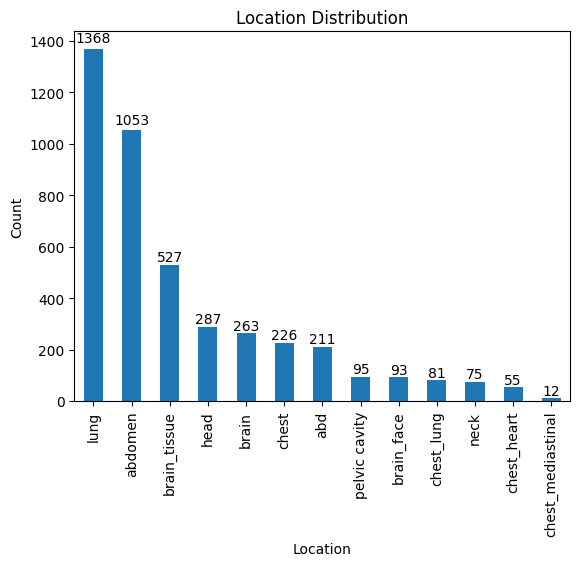

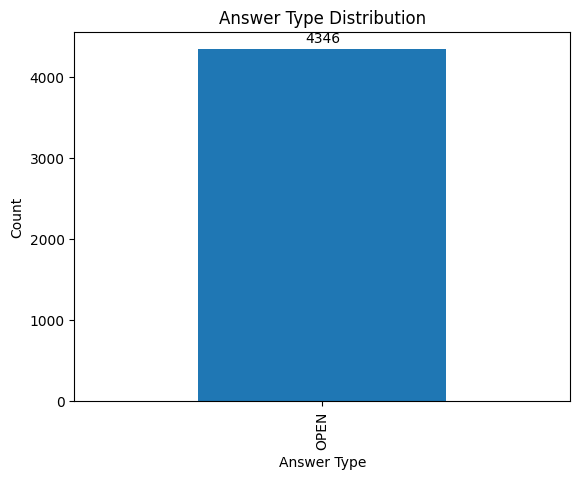

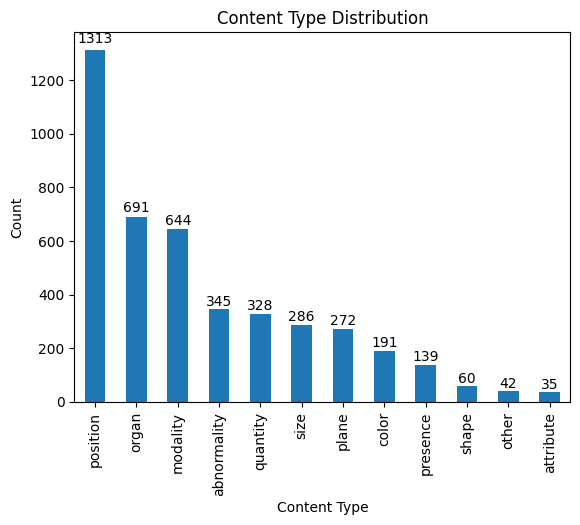

In [38]:
plot_distribution(
    merged_df,
    col="location",
    x_label="Location",
    y_label="Count",
    title="Location Distribution"
)

plot_distribution(
    merged_df,
    col="answer_type",
    x_label="Answer Type",
    y_label="Count",
    title="Answer Type Distribution"
)

plot_distribution(
    merged_df,
    col="content_type",
    x_label="Content Type",
    y_label="Count",
    title="Content Type Distribution"
)